In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
crime1=pd.read_csv('crime_data.csv')

In [3]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime2=crime1.drop(['Unnamed: 0'],axis=1)

In [5]:
crime2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [7]:
array=crime2.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [8]:
# standardization Of data
stscaler=StandardScaler()
crime3=stscaler.fit_transform(array)
crime3

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
# Applying DBSCAN clustering Algorithm
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(crime3)

DBSCAN(eps=2)

In [10]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [11]:
cluster=pd.DataFrame(dbscan.labels_,columns=["clusterid"])
cluster.head(10)

,clusterid
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [22]:
# Adding clusters to dataset
crime4=pd.concat([crime1,cluster],axis=1)
crime4.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [13]:
# Drop the Noise point or outlier
crime5=crime4.drop(crime4.index[1],axis=0).reset_index(drop=True)
crime5

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,0
1,Arizona,8.1,294,80,31.0,0
2,Arkansas,8.8,190,50,19.5,0
3,California,9.0,276,91,40.6,0
4,Colorado,7.9,204,78,38.7,0
5,Connecticut,3.3,110,77,11.1,0
6,Delaware,5.9,238,72,15.8,0
7,Florida,15.4,335,80,31.9,0
8,Georgia,17.4,211,60,25.8,0
9,Hawaii,5.3,46,83,20.2,0


In [14]:
crime6=crime5.drop(["Unnamed: 0"],axis=1)
crime6

,Murder,Assault,UrbanPop,Rape,clusterid
0,13.2,236,58,21.2,0
1,8.1,294,80,31.0,0
2,8.8,190,50,19.5,0
3,9.0,276,91,40.6,0
4,7.9,204,78,38.7,0
5,3.3,110,77,11.1,0
6,5.9,238,72,15.8,0
7,15.4,335,80,31.9,0
8,17.4,211,60,25.8,0
9,5.3,46,83,20.2,0


In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [16]:
Crime7=crime6.drop(['clusterid'],axis=1)
Crime7.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,8.1,294,80,31.0


In [17]:
array2=Crime7.values
array2

array([[ 13.2, 236. ,  58. ,  21.2],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
       [ 12.2, 252. ,  81. ,  46. ],
 

In [18]:
stscaler=StandardScaler()
crime8=stscaler.fit_transform(array2)
crime8

array([[ 1.2563071 ,  0.81590219, -0.55417516,  0.05064792],
       [ 0.08221905,  1.5209171 ,  0.98949621,  1.17143727],
       [ 0.24336839,  0.25675244, -1.1155102 , -0.14377473],
       [ 0.28941106,  1.30211937,  1.7613319 ,  2.26935338],
       [ 0.03617638,  0.42692845,  0.84916245,  2.05205748],
       [-1.02280499, -0.71568192,  0.77899557, -1.10445132],
       [-0.4242503 ,  0.84021305,  0.42816117, -0.56692989],
       [ 1.76277645,  2.0192897 ,  0.98949621,  1.27436691],
       [ 2.22320313,  0.51201646, -0.4138414 ,  0.57673272],
       [-0.56237831, -1.4936294 ,  1.19999686, -0.06371835],
       [-1.18395433, -0.59412762, -0.83484268, -0.74991591],
       [ 0.61170974,  0.97392277,  1.19999686,  0.37087345],
       [-0.12497296, -0.67921563, -0.06300699,  0.02777466],
       [-1.27603967, -1.3720751 , -0.62434204, -1.08157807],
       [-0.40122897, -0.65490477,  0.00715989, -0.31532412],
       [ 0.4505604 , -0.72783735, -0.97517644, -0.50974676],
       [ 1.76277645,  0.

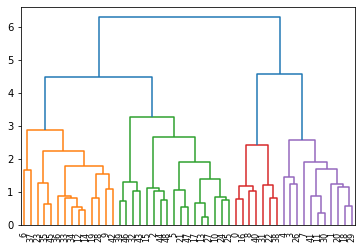

In [19]:
dendrogram=sch.dendrogram(sch.linkage(crime8,method='complete'))

In [20]:
clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
cluster_model=clusters.fit_predict(crime8)
cluster_model

array([2, 3, 0, 3, 3, 0, 1, 3, 2, 1, 0, 3, 1, 0, 1, 0, 2, 0, 3, 1, 3, 0,
       2, 1, 0, 0, 3, 0, 1, 3, 3, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 3, 1, 0,
       0, 1, 0, 0, 0], dtype=int64)

In [21]:
Crime7['clusterid']=cluster_model
Crime7

,Murder,Assault,UrbanPop,Rape,clusterid
0,13.2,236,58,21.2,2
1,8.1,294,80,31.0,3
2,8.8,190,50,19.5,0
3,9.0,276,91,40.6,3
4,7.9,204,78,38.7,3
5,3.3,110,77,11.1,0
6,5.9,238,72,15.8,1
7,15.4,335,80,31.9,3
8,17.4,211,60,25.8,2
9,5.3,46,83,20.2,1
